In [108]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold

In [109]:
dataBaseline = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_Baseline.mat")
dataCincoP = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_CincoP.mat")
dataCinquenta = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_CinquentaP.mat")
dataDez = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_DezP.mat")
dataVinte = loadmat(r"C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\data\Dados12-06_VinteP.mat")

In [110]:
dataBaseline = dataBaseline['Baseline']
dataCincoP = dataCincoP['CincoP']
dataCinquenta = dataCinquenta['CinquentaP']
dataDez = dataDez['DezP']
dataVinte = dataVinte['VinteP']

dadosRigidez = pd.DataFrame()

# Adicionar dataBaseline com coluna y_Baseline
dataBaseline_df = pd.DataFrame(dataBaseline)
dataBaseline_df['y_Baseline'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataBaseline_df], ignore_index=True)

# Adicionar dataCincoP com coluna y_CincoP
dataCincoP_df = pd.DataFrame(dataCincoP)
dataCincoP_df['y_CincoP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCincoP_df], ignore_index=True)

# Adicionar dataDez com coluna y_DezP
dataDez_df = pd.DataFrame(dataDez)
dataDez_df['y_DezP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataDez_df], ignore_index=True)

# Adicionar dataVinte com coluna y_VinteP
dataVinte_df = pd.DataFrame(dataVinte)
dataVinte_df['y_VinteP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataVinte_df], ignore_index=True)

# Adicionar dataCinquenta com coluna y_CinquentaP
dataCinquenta_df = pd.DataFrame(dataCinquenta)
dataCinquenta_df['y_CinquentaP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCinquenta_df], ignore_index=True)

In [111]:
# Sample 100 data points from each category
sample_size = 100

dataBaseline_sampled = dataBaseline_df.sample(n=sample_size, random_state=42)
dataCincoP_sampled = dataCincoP_df.sample(n=sample_size, random_state=42)
dataDez_sampled = dataDez_df.sample(n=sample_size, random_state=42)
dataVinte_sampled = dataVinte_df.sample(n=sample_size, random_state=42)
dataCinquenta_sampled = dataCinquenta_df.sample(n=sample_size, random_state=42)

# Combine the sampled data from each category into the data_teste dataframe
data_teste = pd.concat([dataBaseline_sampled, dataCincoP_sampled, dataDez_sampled, dataVinte_sampled, dataCinquenta_sampled], ignore_index=True)

# Shuffle the new dataframe
data_teste = data_teste.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the sampled data from the original dataframes (dadosRigidez)
dadosRigidez = pd.concat([dataBaseline_df, dataCincoP_df, dataDez_df, dataVinte_df, dataCinquenta_df], ignore_index=True)
dadosRigidez = dadosRigidez.drop(data_teste.index)

In [114]:
dadosRigidez = dadosRigidez.fillna(0)
data_teste = data_teste.fillna(0)


ValueError: x and y must have same first dimension, but have shapes (5830,) and (0,)

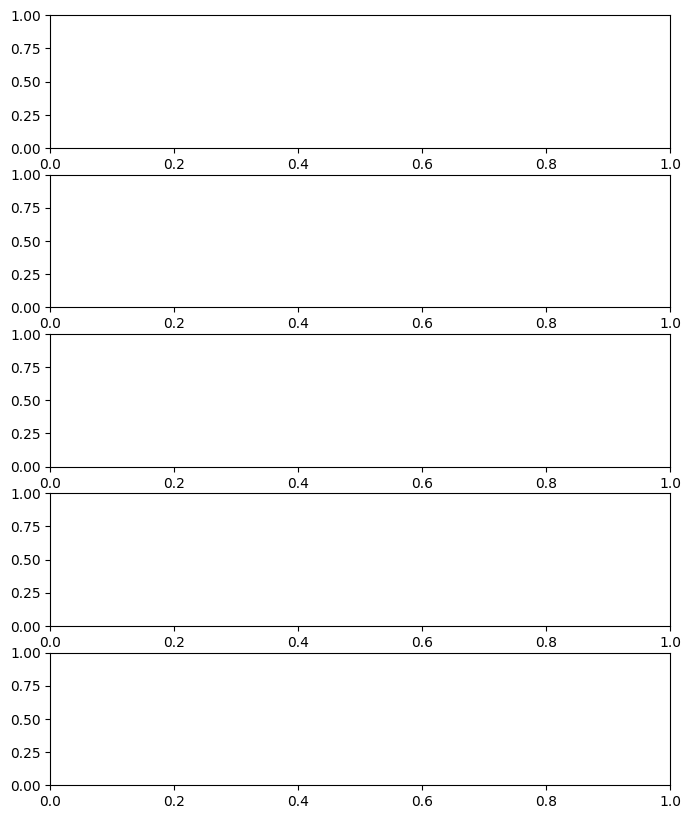

In [115]:
import matplotlib.pyplot as plt

exemplo_baseline = dadosRigidez.loc[200:200].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinco = dadosRigidez.loc[600:600].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_dez = dadosRigidez.loc[1000:1000].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_vinte = dadosRigidez.loc[1400:1400].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinquenta = dadosRigidez.loc[1800:1800].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)

x = range(5830)  # Eixo x de 0 a 5830

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinco.values.flatten(), label='CincoP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(x, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(x, exemplo_dez.values.flatten(), label='DezP')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(x, exemplo_vinte.values.flatten(), label='VinteP')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [29]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'].values, Cinco = dadosRigidez['y_CincoP'].values, Dez = dadosRigidez['y_DezP'].values, Vinte = dadosRigidez['y_VinteP'].values, Cinquenta = dadosRigidez['y_CinquentaP'].values)

In [30]:
y

,Baseline,Cinco,Dez,Vinte,Cinquenta
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,1.0
2496,0.0,0.0,0.0,0.0,1.0
2497,0.0,0.0,0.0,0.0,1.0
2498,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [33]:
x_train = x_train.values

In [34]:
Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.86
Score for fold 2: 0.895
Score for fold 3: 0.8775
Score for fold 4: 0.885
Score for fold 5: 0.88
Average score: 87.95%


In [35]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.85
Score for fold 2: 0.8375
Score for fold 3: 0.83
Score for fold 4: 0.8575
Score for fold 5: 0.83
Average score: 84.1% Correto!


In [36]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(5830, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 5828, 32)          128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2914, 32)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 2912, 64)          6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1456, 64)         0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93184)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [38]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [39]:
history = model.fit(x_train, y_train, epochs=35, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/35
32/32 [==============================] - 11s 296ms/step - loss: 1.6374 - accuracy: 0.2512 - val_loss: 1.5749 - val_accuracy: 0.2475
Epoch 2/35
32/32 [==============================] - 9s 271ms/step - loss: 1.4791 - accuracy: 0.3338 - val_loss: 1.3951 - val_accuracy: 0.3600
Epoch 3/35
32/32 [==============================] - 9s 277ms/step - loss: 1.2863 - accuracy: 0.3969 - val_loss: 1.2592 - val_accuracy: 0.3875
Epoch 4/35
32/32 [==============================] - 9s 271ms/step - loss: 1.1852 - accuracy: 0.4288 - val_loss: 1.2570 - val_accuracy: 0.3600
Epoch 5/35
32/32 [==============================] - 9s 274ms/step - loss: 1.1314 - accuracy: 0.4656 - val_loss: 1.1340 - val_accuracy: 0.4125
Epoch 6/35
32/32 [==============================] - 9s 273ms/step - loss: 1.0543 - accuracy: 0.5144 - val_loss: 1.1640 - val_accuracy: 0.4225
Epoch 7/35
32/32 [==============================] - 9s 270ms/step - loss: 0.9999 - accuracy: 0.5394 - val_loss: 0.9923 - val_accuracy: 0.5450
Epoch

In [40]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score


# ytestpred = model.predict(x_test)
# print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

# #Your input to confusion_matrix must be an array of int not one hot encodings.
# ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))

16/16 [==============================] - 1s 51ms/step


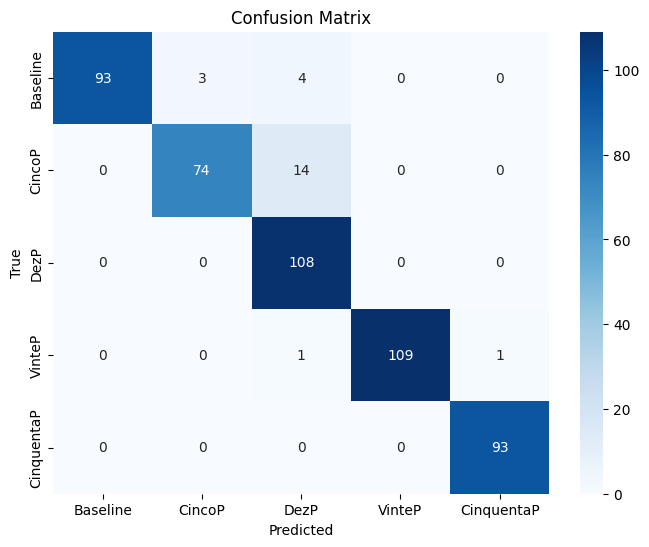

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Definindo o dicionário de nomes das classes
class_names = {
    0: 'Baseline',
    1: 'CincoP',
    2: 'DezP',
    3: 'VinteP',
    4: 'CinquentaP'
}

ytestpred = model.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

16/16 [==============================] - 1s 33ms/step


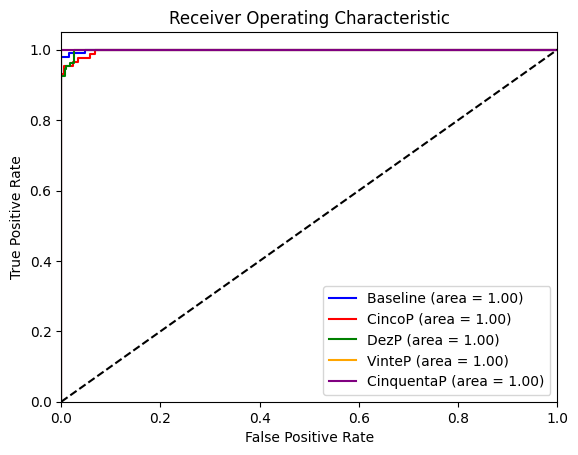

In [77]:
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)
y_test = np.array(y_test)
# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='{} (area = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [43]:
lista = []
n = 4000
for i in range(1829):
    lista.append(n)
    n += 1

for i in range(4001, 5830):
    dadosRigidez.drop(i, axis=1, inplace=True)

In [44]:
dadosRigidez

,0,1,2,3,4,5,6,7,8,9,...,3996,3997,3998,3999,4000,y_Baseline,y_CincoP,y_DezP,y_VinteP,y_CinquentaP
0,-0.069403,-0.063588,-0.057773,-0.062248,-0.069357,-0.072452,-0.067101,-0.061750,-0.060648,-0.060306,...,-0.130950,-0.132836,-0.139047,-0.152636,-0.166225,1.0,0.0,0.0,0.0,0.0
1,-0.065044,-0.066007,-0.067060,-0.068114,-0.067683,-0.066604,-0.065766,-0.066740,-0.067714,-0.067788,...,-0.099748,-0.108176,-0.115379,-0.120434,-0.125490,1.0,0.0,0.0,0.0,0.0
2,-0.046624,-0.049363,-0.052491,-0.054730,-0.056556,-0.056586,-0.054575,-0.053591,-0.055618,-0.057511,...,-0.122820,-0.134014,-0.150081,-0.162518,-0.160432,1.0,0.0,0.0,0.0,0.0
3,-0.061027,-0.058349,-0.060661,-0.064186,-0.065710,-0.063378,-0.061045,-0.060809,-0.060861,-0.060462,...,-0.126137,-0.134830,-0.143523,-0.144816,-0.143472,1.0,0.0,0.0,0.0,0.0
4,-0.047144,-0.048311,-0.049509,-0.050718,-0.050682,-0.049691,-0.050416,-0.053795,-0.056360,-0.056027,...,-0.128839,-0.130245,-0.131278,-0.131822,-0.132551,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.052318,-0.053949,-0.053066,-0.051712,-0.051522,-0.052399,-0.053590,-0.056017,-0.058445,-0.058831,...,-0.168012,-0.175088,-0.183499,-0.195406,-0.210159,0.0,0.0,0.0,0.0,1.0
2496,-0.059069,-0.061156,-0.066373,-0.070567,-0.064325,-0.058083,-0.057988,-0.061586,-0.064222,-0.061814,...,-0.138958,-0.151732,-0.163777,-0.168974,-0.174170,0.0,0.0,0.0,0.0,1.0
2497,-0.056321,-0.054847,-0.053498,-0.054105,-0.054711,-0.054959,-0.055114,-0.056057,-0.057703,-0.059072,...,-0.164833,-0.169078,-0.175247,-0.181415,-0.185003,0.0,0.0,0.0,0.0,1.0
2498,-0.051990,-0.051963,-0.051775,-0.051692,-0.051687,-0.051917,-0.052662,-0.053363,-0.053287,-0.053211,...,-0.156116,-0.166766,-0.177416,-0.185876,-0.193844,0.0,0.0,0.0,0.0,1.0


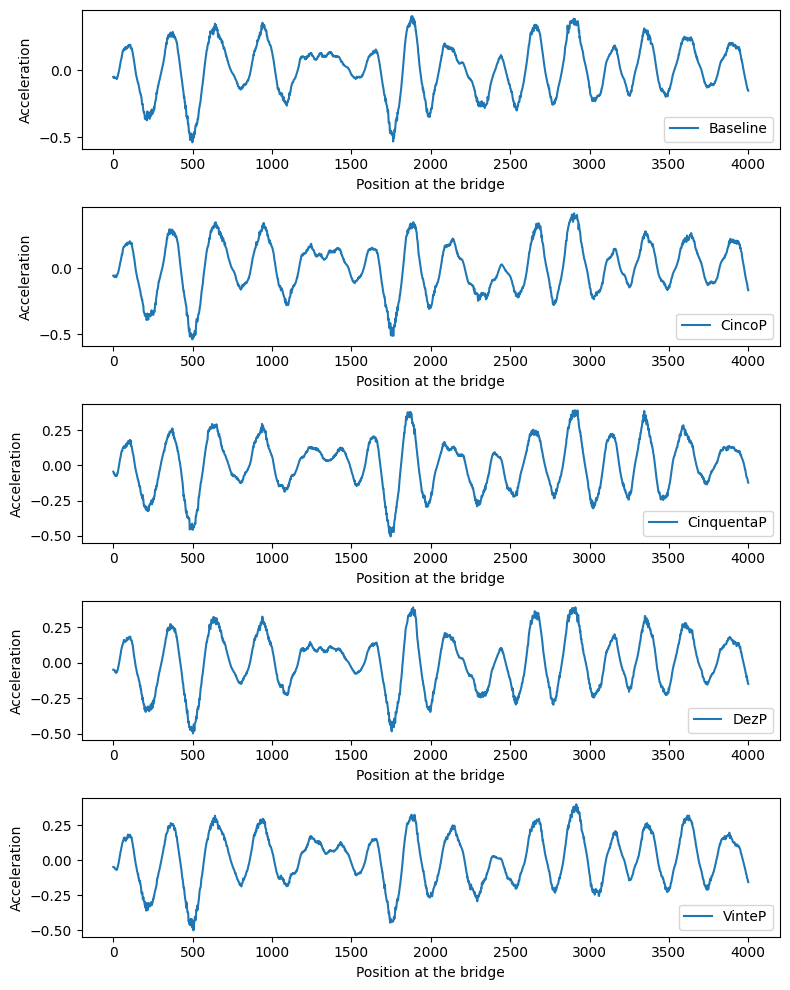

In [45]:
import matplotlib.pyplot as plt

exemplo_baseline = dadosRigidez.loc[250:250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinco = dadosRigidez.loc[750:750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinquenta = dadosRigidez.loc[1250:1250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_dez = dadosRigidez.loc[1750:1750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_vinte = dadosRigidez.loc[2250:2250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)

X = range(4001)  # Eixo x de 0 a 4000

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(X, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(X, exemplo_cinco.values.flatten(), label='CincoP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(X, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(X, exemplo_dez.values.flatten(), label='DezP')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(X, exemplo_vinte.values.flatten(), label='VinteP')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [64]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'].values, Cinco = dadosRigidez['y_CincoP'].values, Dez = dadosRigidez['y_DezP'].values, Vinte = dadosRigidez['y_VinteP'].values, Cinquenta = dadosRigidez['y_CinquentaP'].values)

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
x_train = x_train.values
x_test = x_test.values

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.8875
Score for fold 2: 0.9075
Score for fold 3: 0.8875
Score for fold 4: 0.8975
Score for fold 5: 0.88
Average score: 89.2%


In [50]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)
n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.85
Score for fold 2: 0.8425
Score for fold 3: 0.8025
Score for fold 4: 0.8425
Score for fold 5: 0.83
Average score: 83.35% Correto!


In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(4001, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


In [69]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 3999, 32)          128       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1999, 32)         0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 1997, 64)          6208      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 998, 64)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 63872)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [70]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [71]:
history = model.fit(x_train, y_train, epochs=35, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/35


32/32 [==============================] - 9s 230ms/step - loss: 1.6064 - accuracy: 0.2637 - val_loss: 1.5550 - val_accuracy: 0.3350
Epoch 2/35
32/32 [==============================] - 7s 207ms/step - loss: 1.4573 - accuracy: 0.3587 - val_loss: 1.3555 - val_accuracy: 0.3850
Epoch 3/35
32/32 [==============================] - 6s 188ms/step - loss: 1.2637 - accuracy: 0.4069 - val_loss: 1.2348 - val_accuracy: 0.4125
Epoch 4/35
32/32 [==============================] - 6s 191ms/step - loss: 1.0980 - accuracy: 0.5056 - val_loss: 1.0392 - val_accuracy: 0.5675
Epoch 5/35
32/32 [==============================] - 6s 189ms/step - loss: 0.9439 - accuracy: 0.5900 - val_loss: 0.9319 - val_accuracy: 0.5725
Epoch 6/35
32/32 [==============================] - 6s 191ms/step - loss: 0.8181 - accuracy: 0.6625 - val_loss: 0.8123 - val_accuracy: 0.7025
Epoch 7/35
32/32 [==============================] - 6s 189ms/step - loss: 0.7418 - accuracy: 0.6850 - val_loss: 0.7499 - val_accuracy: 0.7000
Epoch 8/35
32/32 

16/16 [==============================] - 1s 32ms/step


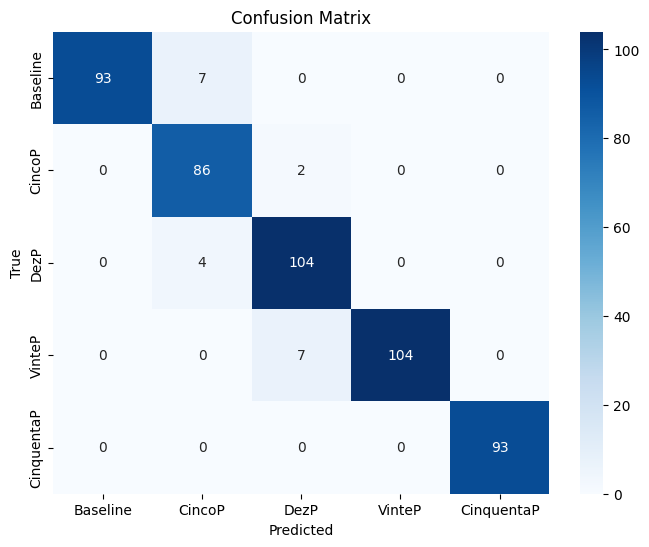

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = {
    0: 'Baseline',
    1: 'CincoP',
    2: 'DezP',
    3: 'VinteP',
    4: 'CinquentaP'
}

ytestpred = model.predict(x_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ytestpred, axis=1))

# Plotando a matriz de confusão com os nomes das classes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [73]:
#100 dados de cada classe para gerar essa matriz de teste (20%)

16/16 [==============================] - 1s 38ms/step


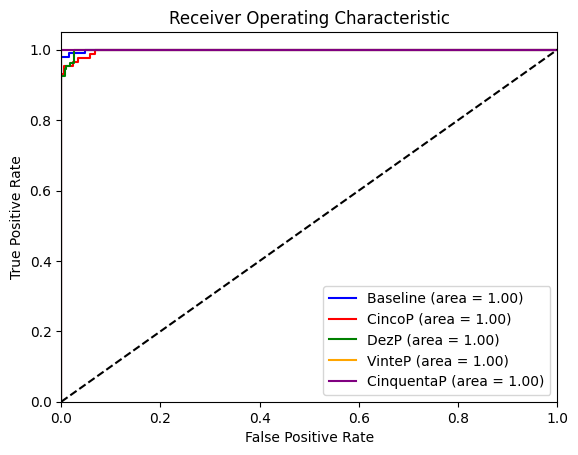

In [76]:
# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)
y_test = np.array(y_test)
# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='{} (area = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [75]:
#Botar legenda correta pras variáveis